In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('Wholesale customers data.csv')
# data.describe()


data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


<Axes: >

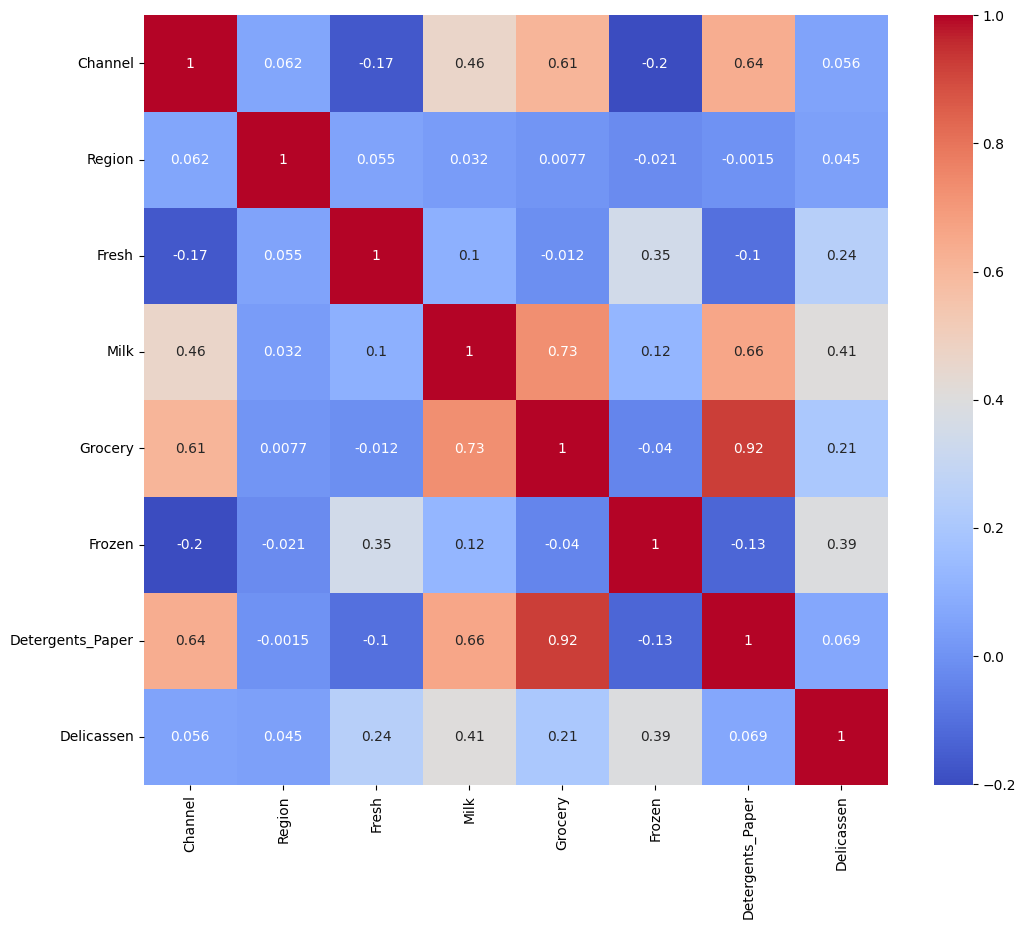

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


corrmat = data.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [16]:
Y = data['Region']
X = data.drop('Region', axis=1)

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
DT = DecisionTreeClassifier(max_depth=3, random_state=42)


# Perform 10-fold cross-validation
cv_scores = cross_val_score(DT, X, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max Decision Tree score: {cv_scores.max()}")


Max Decision Tree score: 0.75


In [18]:
# #KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
# 
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max KNN score: {cv_scores.max()}")


Max KNN score: 0.7272727272727273


In [19]:
#SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Find best parameters using Hyperparameter Tuning

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],
#     'kernel': ['linear', 'rbf', 'poly']
# }
# svc = SVC()
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
#                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_scaled, Y)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print(best_params,best_score)
# implement best_params

svc = SVC(C=0.1, gamma='scale', kernel= 'linear')

cv_scores = cross_val_score(svc, X_scaled, Y,cv=2)

# Output the cross-validation scores for each fold
print(f"Max SVC score: {cv_scores.max()}")


Max SVC score: 0.7181818181818181
